In [11]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [12]:
x_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,random_state=4)

In [17]:
X=torch.from_numpy (x_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
print('Shape',y.shape)
y=y.view(y.shape[0],1)
print('Final Shape',y.shape)


Shape torch.Size([100])
Final Shape torch.Size([100, 1])


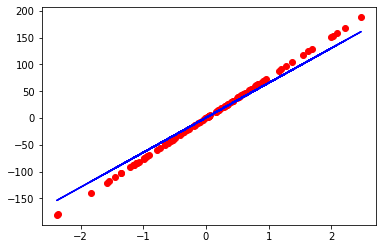

In [20]:
n_samples,n_features=X.shape

#Linear model F=wx+b

input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

#Loss and Optimizer
learning_rate=0.01

criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)


n_epoch=100
for epoch in range(n_epoch):
  y_predicted=model(X)
  loss=criterion(y_predicted,y)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1)%10 == 10:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')


predicted=model(X).detach().numpy()


plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()





